**Statistic for AI and Data Science: Coursework 2**

Your report is to be submitted to a representative of the Texas Department of Transportation.
She is a specialist in metal corrosion and the deterioration of concrete and wants to understand **“what the data says”** but also “how you have processed it” (for example so that she can check that your assumptions are sensible). She is not interested in understanding how your code works.


**Table of Contents**

* [Chapter 1: Introduction](#chapter-1-introduction)
    * [Section 1.1. Scenario](#section-11-scenario)
* [Chapter 2: Requirements](#chapter-2-requirements)
    * [Section 2.1. Part 1: Data Preparation](#section-21-part-1-data-preparation)
        * [2.1.1. Total Population of England](#sub-section-211-total-population-of-england)
        * [2.1.2. Comparison of LSOAs](#sub-section-212-comparison-of-lsoas)
        * [2.1.3. Explanation for differences in age distribution](#sub-section-213-explanation-for-differences-in-age-distribution)
    * [Section 2.2. Part 2: Exploratory Analysis](#section-22-part-2-distribution-of-the-younger-older-and-median-ages-in-each-lsoa)
        * [2.2.1. Adding younger, older residents and median ages to data frame](#sub-section-221-adding-younger-older-residents-and-median-ages-to-data-frame)
        * [2.2.2. Summary statistics](#sub-section-222-summary-statistics)
        * [2.2.3. Median age for England](#sub-section-223-median-age-for-england)
    * [Section 2.3. Part 3: Regression Modelling](#section-23-part-3-comparing-the-median-age-distributions-by-area-type)
        * [2.3.1. Add type of area to data frame](#sub-section-231-add-type-of-area-to-data-frame)
        * [2.3.2. Distributions of median age for each area type](#sub-section-232-distributions-of-median-age-for-each-area-type)
        * [2.3.3. Differences of distributions of median ages](#sub-section-233-differences-of-distributions-of-median-ages)


# Chapter 1: Introduction
## Scenario
The management of the Texas Department of Transportation wishes to investigate the use of
the following variables to predict the current condition of bridges:
1. Age (derived from variable Year)
2. average use (variable AverageDaily)- Average daily traffic
3. percent trucks (variable Trucks_percent)- Average daily truck traffic
4. material (variable Material)
5. design (variable Design)


The current condition is derived from variables Deck_rating, Superstr_rating and
Substr_rating of the bridges. They wish to know:
-  How well the proposed variables can predict the bridge condition.
-  Which of the proposed variables has more influence on the current condition.

# Chapter 2: Requirements

Give an order to the categories of the rating variables. Create a dictionary with the variable type of each variable.
Output is a dataset with only integer and category- data type objects.

## Part 1. Data Preparation

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

In [163]:
#First, we create categories to organise the data

# The code below declares a categorical type with categories in a specified order
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}
df = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict)

df.head()

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200


### Step 1: Derive Age variable
Since the data was collected in 2019, we substract each bridge's year from 2019 to get its age.

In [135]:
df['Age']= 2019-df.Year
df.Age


0        14
1        14
2         7
3        69
4        15
         ..
34288    25
34289    19
34290    23
34291    28
34292    17
Name: Age, Length: 34293, dtype: int64

### Step 2: Exclude very old bridges (possibility the historic ones)**
We exclude them to make the analysis more clear and relevant for future conclusions.

In [136]:
df = df[df.Historic !='Register']



### Step 3: Reduce the number of categories of materials and design by merging some of the very small categories
By extracting the number of bridges in each category, we delete the smallest ones.

In [137]:
# Step 1: Replace specified values with 'Other'
df.loc[:, 'Material'] = df['Material'].replace(['Masonry', 'Timber'], 'Other')
df.loc[:, 'Design'] = df['Design'].replace(['Arch', 'Frame', 'Truss', 'Movable', 'Suspension'], 'Other')

# Step 2: Verify changes
print(df['Material'].value_counts())
print(df['Design'].value_counts())



Material
Concrete    26924
Steel        6432
Other         520
Name: count, dtype: int64
Design
Beam     28161
Slab      4276
Other     1439
Name: count, dtype: int64


/tmp/ipykernel_161/1467704753.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.loc[:, 'Material'] = df['Material'].replace(['Masonry', 'Timber'], 'Other')
/tmp/ipykernel_161/1467704753.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Concrete', 'Concrete', 'Concrete', 'Other', 'Concrete', ..., 'Concrete', 'Concrete', 'Concrete', 'Concrete', 'Steel']
Length: 33876
Categories (3, object): ['Concrete', 'Other', 'Steel']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Material'] = df['Material'].replace(['Masonry', 'Timber'], 'Other')
/tmp/ipykernel_161/1467704753.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) wit

### Step 5: Derive current condition

1. Order categorical variables by labels

 Current condition should be derived from the combination of the three main condition variables (ignore 'scour'), by treating each as an integer score (0 for failed) and adding the three scores.
 
 - A variable Current_rating is added to the dataset. Current_rating is continuous, so it allows for regression analysis.

**Looking for null values**

Both deck_rating has 5 null and Superstr_rating has 2 null values. Since there are only a small number of null, we can ignore them for now.

In [138]:
# Search for null values
df.loc[(df.Deck_rating.isnull()) | (df.Superstr_rating.isnull()) ]


,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
367,010920004518118,District1,0,Free,State,Rural,Arterial,1970,2,2,...,42.7,12.2,NaN,Good,Good,32.7,2.0,No waterway,10530,49
1874,021200AA0205001,District2,11,Free,County,Rural,Local,1946,1,0,...,17.7,3.9,Good,NaN,Fair,11.8,0.0,Stable,390,73
4668,031690AA0273001,District3,5,Free,County,Rural,Local,2008,2,0,...,12.2,7.2,NaN,Very Good,Very Good,32.7,0.0,Dry,40,11
15698,121020B37610001,District12,2,Free,Town or City,Urban,Local,2008,2,0,...,15.2,8.2,NaN,Good,Good,32.7,0.0,Stable,150,11
18018,131580AA0323001,District13,159,Free,County,Rural,Local,1999,1,0,...,8.5,6.0,NaN,Very Good,Good,32.7,0.0,Dry,100,20
29605,190190102001006,District19,10,Free,State,Rural,Minor,1991,2,0,...,67.1,9.1,NaN,Good,Good,32.7,16.0,Dry,230,28
31765,211090AA0348002,District21,6,Free,County,Rural,Local,1960,2,0,...,11.0,5.5,Failing,NaN,Poor,0.0,0.0,Stable,30,59


In [139]:
# Create a function to extract the Current rating of each row (each bridge)
def current_condition(row):
    rating_scores=['Deck_rating', 'Substr_rating', 'Superstr_rating']
    labels= ['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent']
    rating=0

    for rating_type in rating_scores:
        for index in range(len(labels)):
            if row[rating_type] == labels[index]:
                rating+= index
  
    return rating

current_condition(df.loc[0])

23

In [140]:
# Apply the function to the data set to create a unique variable called current_rating
df= df.assign(Current_condition = df.apply(current_condition, axis=1))

## Part 2: Exploratory analysis
No we will look at the relationship between the five predictor variables and the target variable requested. Then, we will specifically look at and 
 comment on the relationship between the predictors. Lastly, preliminary conclusions will be drawn at the end of this part of the analysis on the answers to the questions asked by the Texas Department of Transportation.

Some observations to note are:
 - The variable Current_rating will be treated as continuous, as it consists of an integer score with a true zero value, and allows to analyse how the variable changes with respect to other continuous variables.
 - In the following analysis, the current condition of the bridges, represented by the variable **Current_condition** will always be plotted on the y-axis since it is the target variable we want to predict.

- Scatter plots: Difficult to interpret because the data is very skewed and has outliers. Deal with skew and outliers

### Relationship between all numerical variables

Firstly, we will look at the relationship between the numerical predictor variables and the target variable **Current_condition** using a correlation matrix. Next, we will look at each individual relationship specifically. To investigate how each individual continuous variable predicts the current condition of bridges, we will use both scatter plots and bar plots.

Scatter plots allow to assess the relationship between pairs of continuous variables. Further, if a relationship exists it allows to observe the direction and gradient or strength of the relationship.
Bar plots are used because they are easy to read, allow to group the predictor variable into 'bins' to see how the current conditions of bridges vary over a specific range of values.

Firstly, the following heat map displays the correlation of each pair of variables using a color coded matrix. 

We make the following observations:
- There exists a strong negative correlation of -0.59 between the variable 'Age' and 'Current_condition'. This relationship shows that a bridge's condition deteriorates as time goes by, an association which would be expected to show in the data.
- A bridge's age ('Age') and average daily truck traffic (Trucks_percent) shows a small positive correlation, suggesting that older bridges tend to have slightly more Truck traffic. This could possibly be because older bridges were build to be more wide, or because trucks tend to take common, older routes instead of newer ones. However, this association is very small, so no certain conclusions can be made from that value. It could also be due to chance.

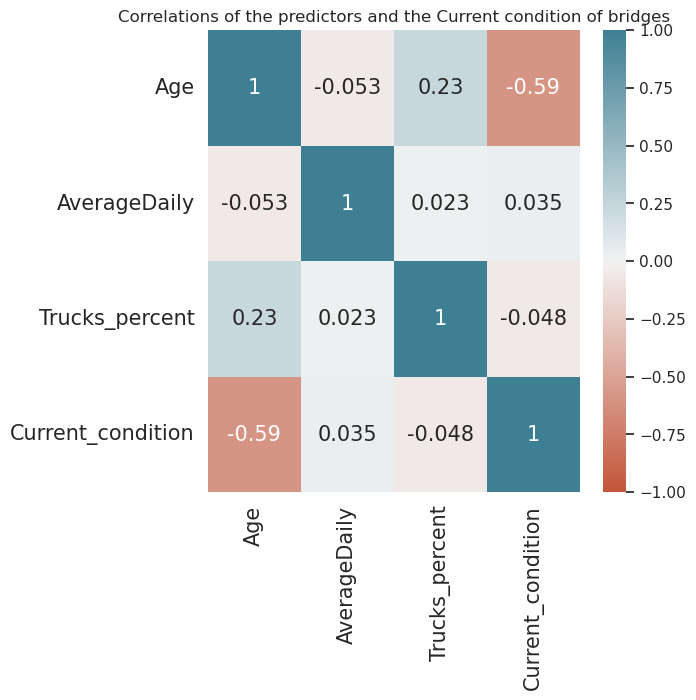

In [141]:
# Select only the variables you want to include in the heatmap
selected_vars = ['Age', 'AverageDaily', 'Trucks_percent', 'Current_condition']  # Update with your specific variable names
df_selected = df[selected_vars]

# Calculate the correlation matrix for the selected variables
corr_matrix = df_selected.corr(numeric_only=True)

# Plot the heatmap

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 15}).set_title('Correlations of the predictors and the Current condition of bridges')
plt.yticks(rotation=0, fontsize=15)
plt.xticks(fontsize=15)
plt.show()


### Relationship between predictor variables and target variable

#### Relationship between Age and Current rating (Current_rating)

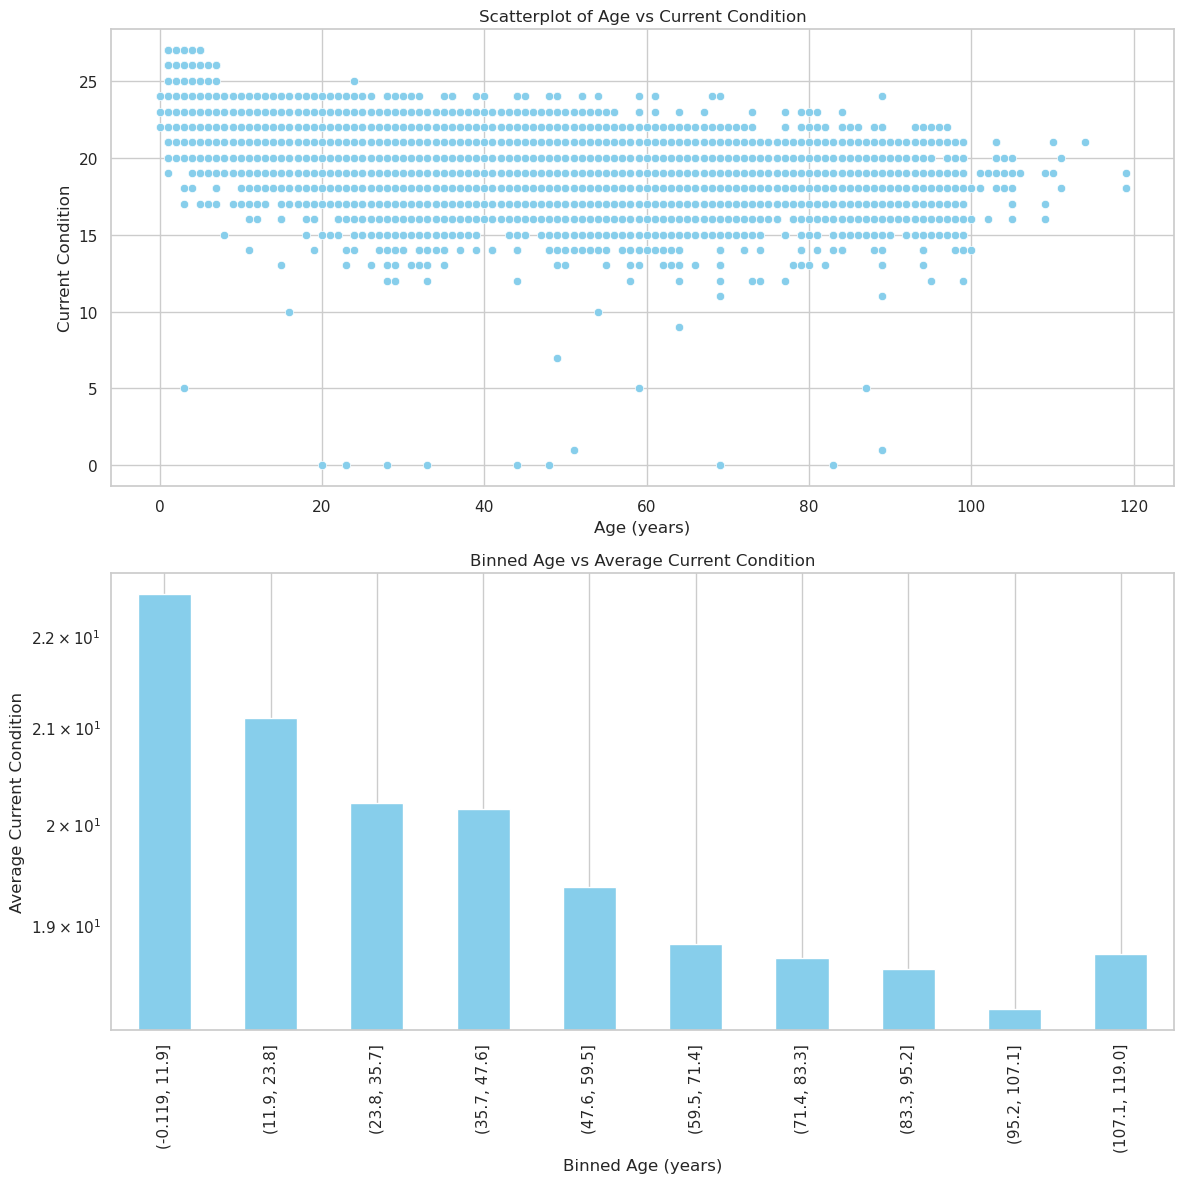

In [142]:

# Set plot size and style
fig, (a1, a2) = plt.subplots(2, 1, figsize=(12, 12))
sns.set(style="whitegrid")

# Plot 1: Scatterplot - Age vs Current_condition
sns.scatterplot(x='Age', y='Current_condition', data=df, ax=a1, color='skyblue')
a1.set_title('Scatterplot of Age vs Current Condition')
a1.set_xlabel('Age (years)')
a1.set_ylabel('Current Condition')

# Plot 2: Bar Plot - Age (binned) vs Current_condition
df['Age_binned'] = pd.cut(df['Age'], bins=10)  # Adjust the number of bins as necessary
age_condition = df.groupby('Age_binned', observed=False)['Current_condition'].mean()  # Calculate the mean condition per age bin
age_condition.plot(kind='bar', color='skyblue', ax=a2, logy=True)
a2.set_title('Binned Age vs Average Current Condition')
a2.set_xlabel('Binned Age (years)')
a2.set_ylabel('Average Current Condition')

# Adjust layout to make it more clear
plt.tight_layout()
plt.show()


Both the scatter plot and the bar plot, show the negative association between both variables. In the scatter plot, we see that a bridge's age increases, scores for the current condition of a bridge, tend to concentrate towards lower values. Specifically, new bridges, closer to the Age= 0 value, show higher current condition scores. This value would be expected.

In the second plot, the bar plot, since we standardized the values on the y-axis, that corresponding to the current condition of bridges, we can observe a more clear comparison of how a bridge's condition decreases as age ranges increase. 

It is interesting to observe that bridges within the highest age range have slightly higher current condition scores than the association would predict. It is possible that there is a subset of bridges which have survived a long time, which have better materials and structure, and therefore are have slightly higher current condition scores.

#### Relationship between Average Daily and Current rating (Current_rating)


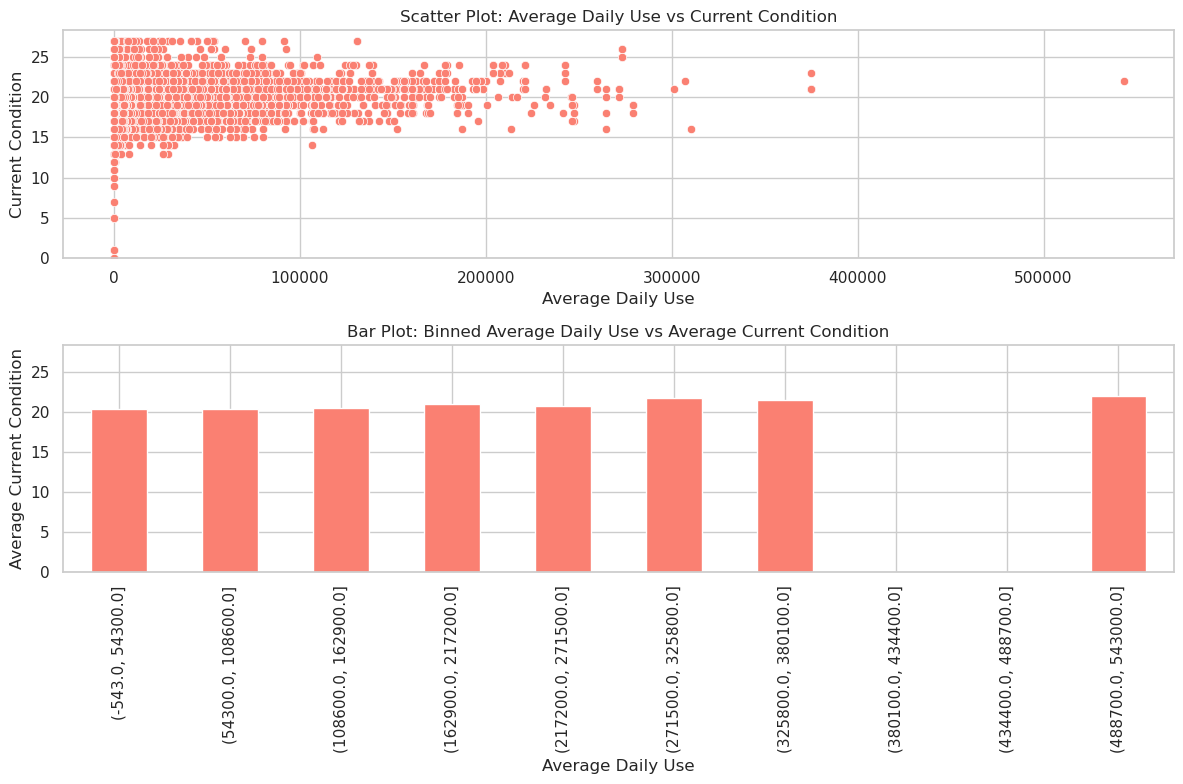

In [143]:
# Labels for legends and axes
l2 = 'Average Daily Use'

# Create a figure with 2 subplots arranged in 2 rows and 1 column
fig, (a1, a2) = plt.subplots(2, 1, figsize=(12, 8), sharey=True) 

# Plot 1: Average Daily Use vs Current_condition - Scatter plot
sns.scatterplot(x='AverageDaily', y='Current_condition', data=df, ax=a1, color='salmon')
a1.set_title('Scatter Plot: Average Daily Use vs Current Condition')
a1.set_xlabel(l2)
a1.set_ylabel('Current Condition')

# Bin AverageDaily and calculate the mean Current_condition for each bin
df['AverageDaily_binned'] = pd.cut(df['AverageDaily'], bins=10)  # Adjust bins as needed
binned_condition = df.groupby('AverageDaily_binned', observed=False)['Current_condition'].mean()

# Plot 2: Binned Average Daily Use vs Average Current Condition - Bar plot
binned_condition.plot(kind='bar', color='salmon', logy=False, ax=a2)
a2.set_title('Bar Plot: Binned Average Daily Use vs Average Current Condition')
a2.set_xlabel(l2)
a2.set_ylabel('Average Current Condition')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Both variables, Average Daily Use and Current Condition, are continuous, so they are visualized with scatter and bar plots.

The scatter plot shows that the Current Condition scores exhibit low variability across different levels of Average Daily Use. In the bar plot, which groups Average Daily Use into bins, most ranges show similar Current Condition scores, typically between 15 and 25.

Additionally, most Current Condition scores are concentrated in the low to medium ranges of Average Daily Use, indicating that few bridges experience very high usage (e.g., over 300,000 vehicles daily). In the bar plot, the average Current Condition is approximately 20 out of a possible 30 points, suggesting that many bridges maintain a condition score above 50%.

Interestingly, there are numerous bridges with an Average Daily Use of 0, possibly indicating unused structures or missing data defaulted to zero. To assess the effect of these low-use bridges on the distribution, we further analyzed the data by focusing on the 90th percentile of Average Daily Use.

Finally, the scatter plot shows that Current Condition is discrete, with values in distinct bands due to its calculation method. Even as Average Daily Use increases, Current Condition remains consistently within the 16–26 range, indicating a weak or limited relationship between bridge usage and condition.



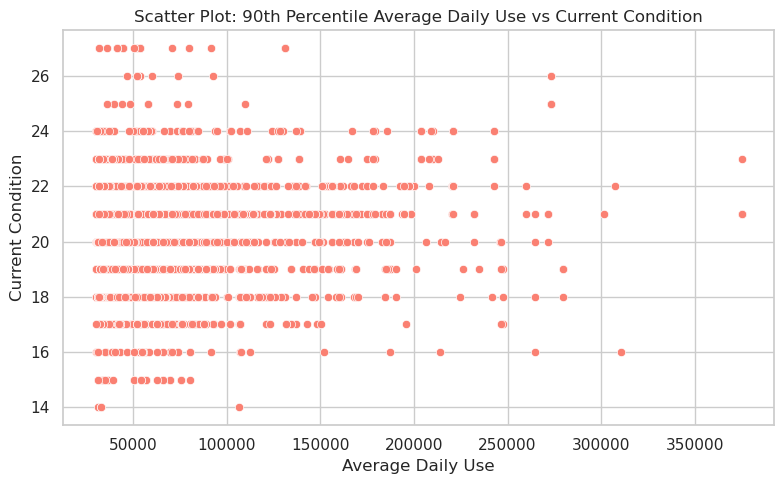

In [144]:

# Calculate the 95th percentile for 'AverageDaily'

df_filtered1= df.loc[(df.AverageDaily < 400000)]
percentile_90=df_filtered1.AverageDaily.quantile(0.90)

# Filter the dataset to only include rows where 'AverageDaily' is above the 95th percentile
df_filtered = df_filtered1[df_filtered1['AverageDaily'] >= percentile_90]

# Labels for legends and axes
l2 = 'Average Daily Use'

# Create a figure with 2 subplots arranged in 2 rows and 1 column
fig, a1 = plt.subplots(1, 1, figsize=(8, 5), sharey=True) 

# Plot 1: Average Daily Use vs Current_condition - Scatter plot for filtered data
sns.scatterplot(x='AverageDaily', y='Current_condition', data=df_filtered, ax=a1, color='salmon')
a1.set_title('Scatter Plot: 90th Percentile Average Daily Use vs Current Condition')
a1.set_xlabel(l2)
a1.set_ylabel('Current Condition')

# Adjust layout for better readability
plt.tight_layout()
plt.show()



#### Relationship between Trucks percentage and Current rating (Current_rating)

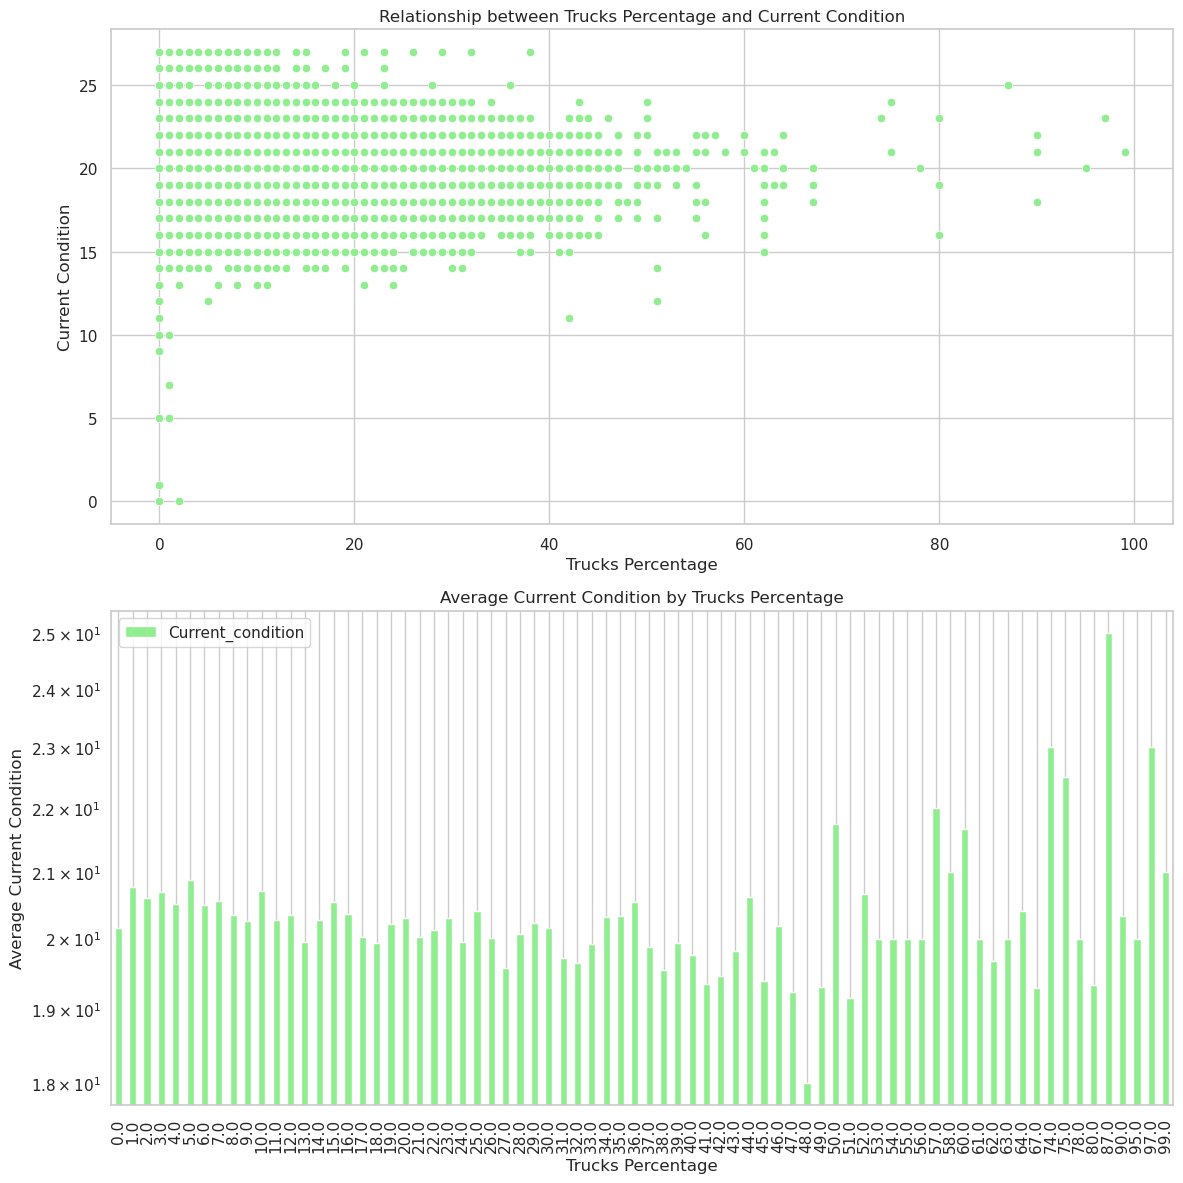

In [145]:
# Labels for legends and axes
l3 = 'Trucks Percentage'

# Set plot size and style
fig, (a1, a2) = plt.subplots(2, 1, figsize=(12, 12))
sns.set(style="whitegrid")

# Plot 1: Trucks Percentage vs Current_condition (Scatter Plot)
sns.scatterplot(x='Trucks_percent', y='Current_condition', data=df, ax=a1, color='lightgreen')
a1.set_title('Relationship between Trucks Percentage and Current Condition')
a1.set_xlabel(l3)
a1.set_ylabel('Current Condition')

# Plot 2: Bar Plot of Average Current Condition by Trucks Percentage
# First, calculate the average Current_condition for each Trucks_percent
avg_current_condition = df.groupby('Trucks_percent')['Current_condition'].mean().reset_index()

# Plot the averages as a bar plot
avg_current_condition.plot(kind='bar', x='Trucks_percent', y='Current_condition', color='lightgreen', ax=a2)
a2.set_title('Average Current Condition by Trucks Percentage')
a2.set_xlabel(l3)
a2.set_ylabel('Average Current Condition')
a2.set_yscale('log') 

# Adjust layout
plt.tight_layout()
plt.show()

Both these variables are continuous, so their relationship is plotted with a scatter and a bar plot.

Firstly, the scatter plot shows a very similar distribution to that of 'Current_condition' and 'Average_daily'. Since 'Average_daily' measures the daily traffic of a bridge and and 'Trucks_percent' measures the average daily traffic that is truck traffic. Hence, it makes sense that both variables have a similar association with our target variable 'Current_condition'. Moreover, looking at the bar plot, by percentage value of truck traffic, we can observe that towards higher values of the variable, the scores of a bridge's condition are higher on average. Hence, it is possible that trucks have a preference towards bridges that are better maintained. Or, alternatively, that bridges that are transited more often by trucks are better maintained. 

Nevertheless, the percentage of trucks as a measure does not appear to have a significant association with a bridge's rating score.

### Relationships between categorical predictor variables and continuous variable

We want to visualize how the distribution of the target variable "Current condition" changes given the value of the categories in Design and Material. Each individual relationship will be plotted using a boxplot and a pie chart. 

A boxplot consists of a visualisation of the summary statistics of a distribution. It allows summarise the distribution of the Current condition of a bridge for each of the categories of Material, and Design, respectively. By definition, the boxplot spans the interquartile range (IQR), showing where the middle 50% of data points lie (from the first quartile (Q1) to the third quartile (Q3)). The whiskers extend from the box to the minimum and maximum values within 1.5 * IQR from Q1 and Q3, indicating the range of typical data values.



#### Relationship between Material(Material) and Current rating (Current_condition)


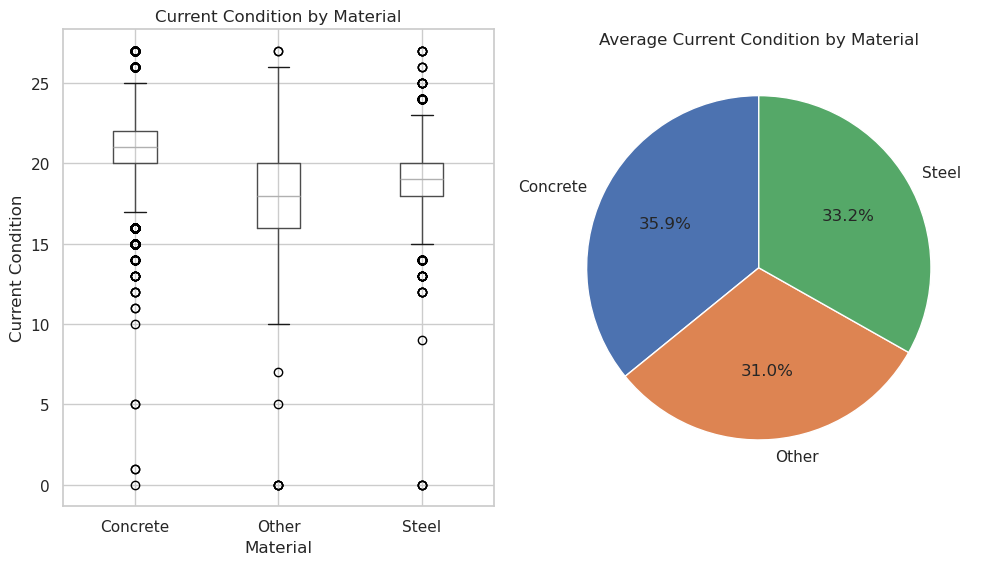

In [146]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Box Plot: Current Condition by Material
df.boxplot(column='Current_condition', by='Material', ax=ax1)
ax1.set_title('Current Condition by Material')
ax1.set_ylabel('Current Condition')
ax1.set_xlabel('Material')
fig.suptitle('')  # Remove automatic subtitle

# Aggregate Current_condition by Design to get mean values for the pie chart
design_agg = df.groupby('Material', observed=False)['Current_condition'].mean()

# Pie Chart: Average Current Condition by Design
design_agg.plot(kind='pie', autopct='%1.1f%%', ax=ax2, legend=False, startangle=90)
ax2.set_ylabel('')  # Hide y-axis label
ax2.set_title('Average Current Condition by Material')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


On the boxplot on the left, we can see the distribution of the current condition scores across all three categories of Material. The median value, corresponding to the value in the middle of the distribution is represented by the grey line inside the box. 
Comparing all categories, we can see how the median current condition of materials different from concrete and steel is slightly lower than that of concrete or steel. This suggests that steel and concrete may be better building materials to maintain a bridge. 

We can see that there are multiple points below and above the whiskers of the boxplots, these are outliers. Bridges built with concrete appear to have more outliers towards lower values of current condition, but also have outliers towards the higher values of current condition scores. 
We may conclude that grouping smaller categories of Material type into other results in higher variability and thus longer whiskers, as illustrated in the boxplot. 

Lastly, in the pie chart on the right, we can see the distribution of scores accross each category. On average, concrete is the material with which more bridges have been built, with a value of 35.9%.


#### Relationship between Design (Design) and Current condition (Current_condition)
- categorical vs. continuous

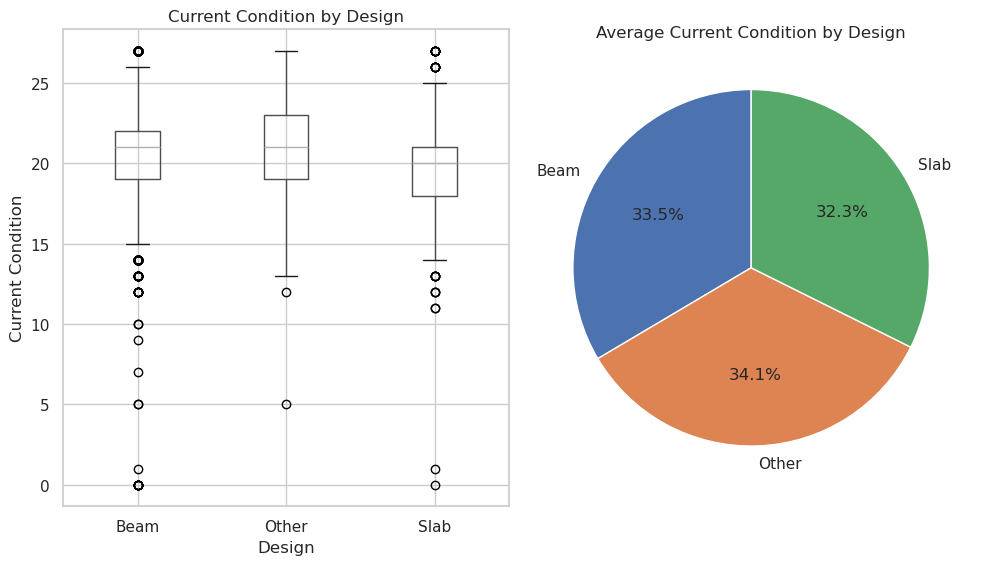

In [147]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Box Plot: Current Condition by Material
df.boxplot(column='Current_condition', by='Design', ax=ax1)
ax1.set_title('Current Condition by Design')
ax1.set_ylabel('Current Condition')
ax1.set_xlabel('Design')
fig.suptitle('')  # Remove automatic subtitle

# Aggregate Current_condition by Design to get mean values for the pie chart
design_agg = df.groupby('Design', observed=False)['Current_condition'].mean()

# Pie Chart: Average Current Condition by Design
design_agg.plot(kind='pie', autopct='%1.1f%%', ax=ax2, legend=False, startangle=90)
ax2.set_ylabel('')  # Hide y-axis label
ax2.set_title('Average Current Condition by Design')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


The boxplot on the left shows the distribution of current condition scores across the three bridge design categories. The median (grey line within the box) indicates similar central values for current condition across all design types.

The 'Other' category, which groups designs like 'Arch,' 'Frame,' 'Truss,' 'Movable,' and 'Suspension,' displays greater variability, likely because it consolidates multiple design types. The 'Beam' category shows a concentration of outliers at lower current condition values, including some at 0. This may represent genuinely poor conditions or default input values. Due to this variability, focusing on scores above 5 could be more insightful. The wide spread in the 'Beam' category suggests that bridge condition may vary more for this design type, potentially indicating that other factors (e.g., age or traffic load) interact with design type to influence condition.

The pie chart on the right shows that current condition scores are evenly distributed across the three design categories. This suggests that condition is balanced proportionally across design types but may warrant further analysis to understand how other variables impact condition across these categories.

### Relationships between predictor variables

#### Continuous vs. Continuous predictor variables

We have used a scatter plot matrix to visualize the relationships between the three continuous predictor variables: Average use ('AverageDaily'), age ('Age') and percent trucks ('Trucks_percent'). Each diagonal entry corresponds to the discribution of the frequency of the variable. Could be interpreted as a density function.

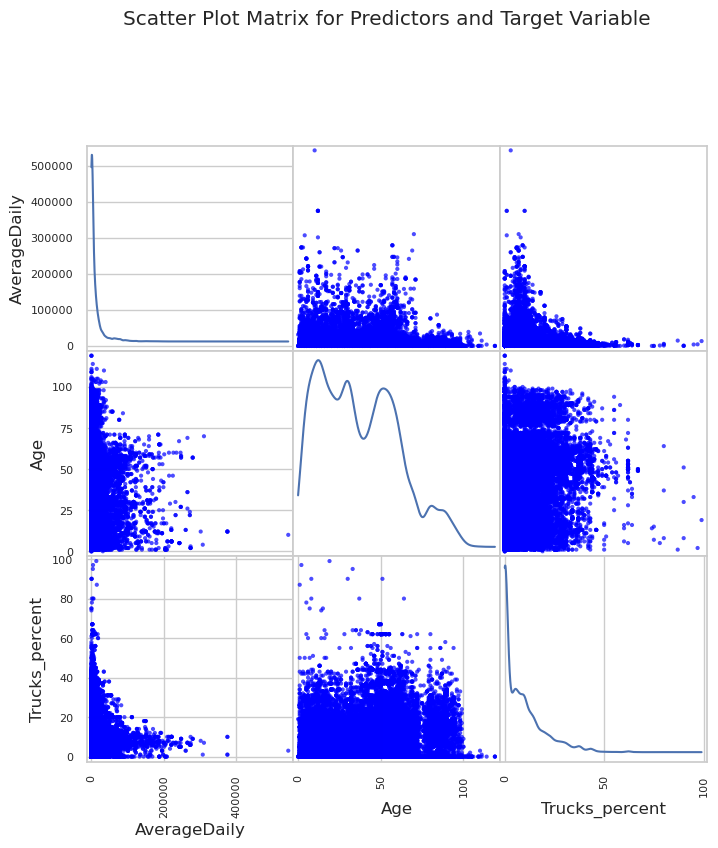

In [148]:

# Select only the relevant columns for the scatter matrix
predictor_columns = ['AverageDaily', 'Age', 'Trucks_percent']
scatter_matrix = pd.plotting.scatter_matrix(df[predictor_columns], figsize=(8, 8), alpha=0.7, diagonal='kde', color='blue')

# Adjust layout for readability
plt.suptitle("Scatter Plot Matrix for Predictors and Target Variable", y=1.05)
plt.show()

This scatter plot shows all three pairs of relationships between our continuous variables. The most significant relationship is that between AverageDaily and Trucks_percent, which shows a distribution very skewed to the right. This means that most values of average daily use (of bridges) are concentrated towards lower average daily use and percent of trucks traffic.

Distribution for other pairs of variables show to be very distributed across the graphs.


#### Categorical vs. Continuous predictor variables

We now plot all pairs of relationships between the continuous variables and the categorical variables Material and Design.

Text(0, 0.5, 'Trucks (%)')

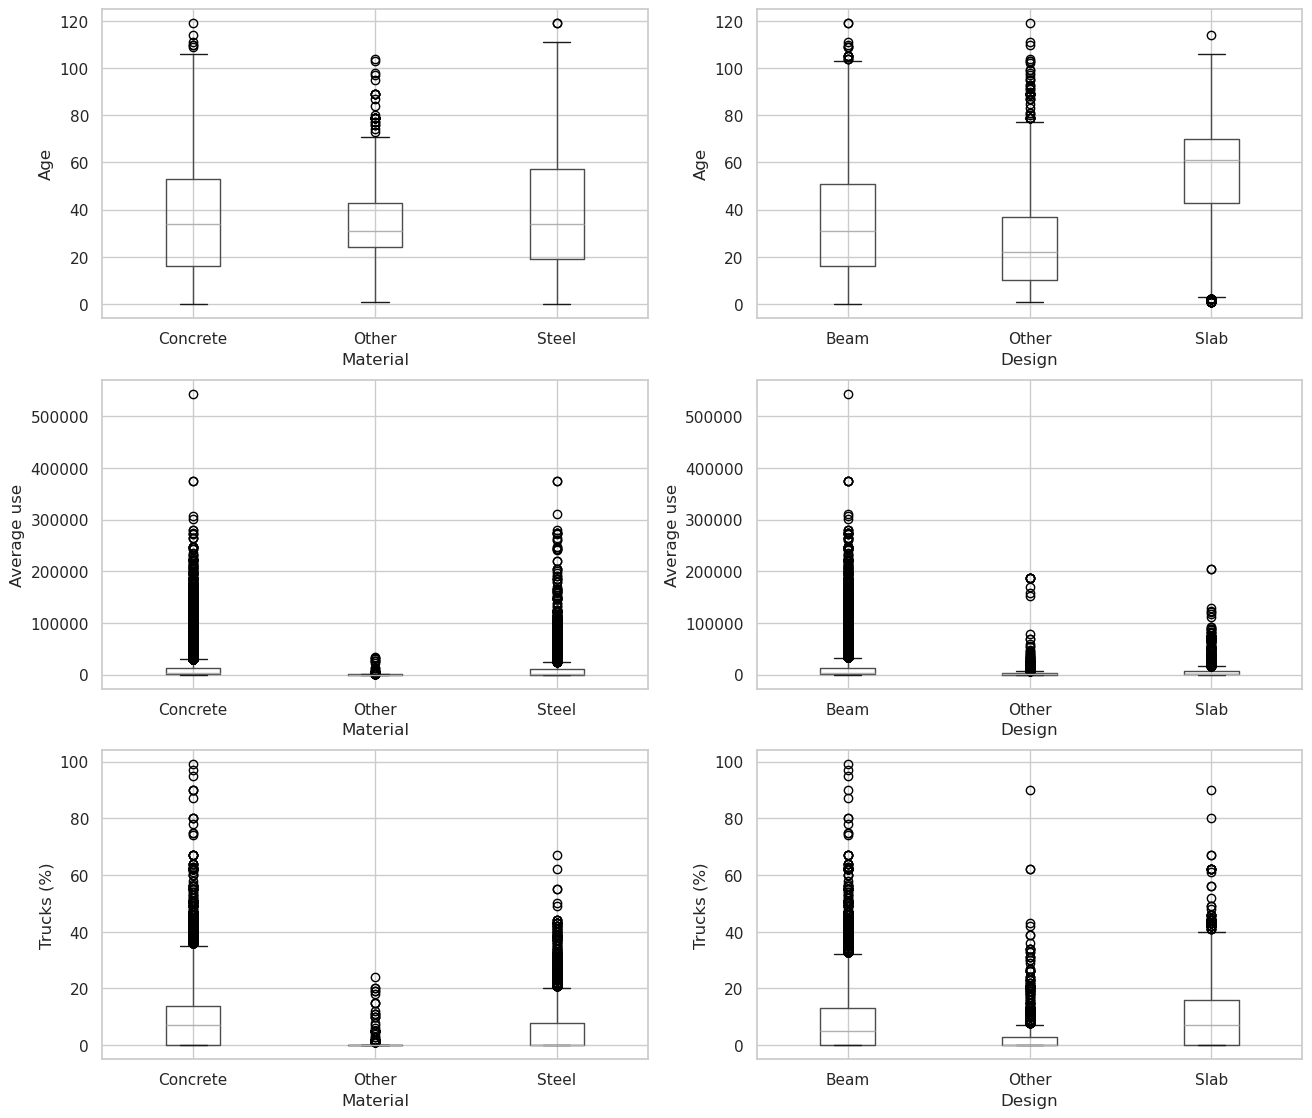

In [149]:
# Add a colour for each continuous variable (on the y-axis)
# Continuous vs. Categorical variables

fig, ((a1, a2), (a3, a4), (a5, a6)) = plt.subplots(3,2, figsize=(15,14))

df.boxplot(column='Age', by='Material', ax=a1)
df.boxplot(column='Age', by='Design', ax=a2)
df.boxplot(column='AverageDaily', by='Material', ax=a3)
df.boxplot(column='AverageDaily', by='Design', ax=a4)
df.boxplot(column='Trucks_percent', by='Material', ax=a5)
df.boxplot(column='Trucks_percent', by='Design', ax=a6)

# Make the plots a bit clearer
fig.suptitle('')
[a.set_title('') for a in [a1, a2, a3, a4, a5, a6]]
a1.set_ylabel('Age')
a2.set_ylabel('Age')
a3.set_ylabel('Average use')
a4.set_ylabel('Average use')
a5.set_ylabel('Trucks (%)')
a6.set_ylabel('Trucks (%)')


This set of boxplots reveals the distribution of all continuous variables across the categories of Material and Design.
For average use, there appears to be a lot of outliers, across all categories, which suggests that this variable is not normally distributed. This may hinder interpretation. 

The variable age, however, shows  to have a similar median across all categories, and a significantly higher median value for Design type 'Slab', suggesting old bridges to be made of slap in a higher proportion.


#### Relationships between categorical predictor variables

We will show the relationship between categorical predictor variables and the target variable through a contingency table. The values extracted from the contingency table are used to create a heatmap, which illustrates the strength of the dependence of one variable with respect to another.

In [150]:
# Calculate joint probabilities (normalizing across all combinations)
#   The first parameter is the index: since we normalise this become sthe conditioning variable
#   The second parameter is the columns: the variable(s) whose prob dist is give for each conditioning value
joint_prob = pd.crosstab(df.Design, df.Material, normalize='all')

# Calculate conditional probabilities (Material given Design)
#  The first parameter is the index (it can be a list)
#  The second parameter is the columns (it can be a list)
conditional_prob = pd.crosstab(df.Material, df.Design, normalize='index')

# Display the tables of values
print("Joint Probability Table:")
print(joint_prob.round(4) * 100)  # Multiply by 100 for percentage representation
print("\nConditional Probability Table:")
print(conditional_prob.round(4) * 100)  # Multiply by 100 for percentage representation


Joint Probability Table:
Material  Concrete  Other  Steel
Design                          
Beam         63.82   1.37  17.94
Other         3.04   0.17   1.04
Slab         12.62   0.00   0.00

Conditional Probability Table:
Design     Beam  Other   Slab
Material                     
Concrete  80.30   3.82  15.88
Other     89.23  10.77   0.00
Steel     94.50   5.50   0.00


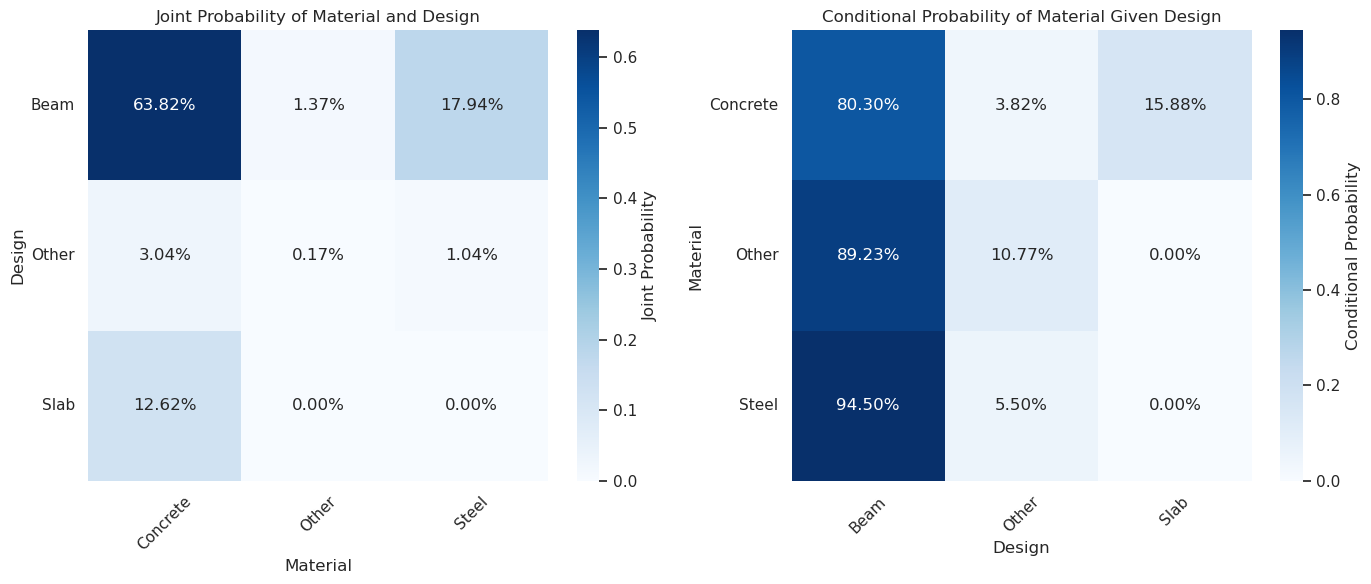

In [151]:
# Plotting the joint probabilities and conditional probabilities
plt.figure(figsize=(14, 6))

# Joint Probability Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(joint_prob, annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Joint Probability'})
plt.title('Joint Probability of Material and Design')
plt.xlabel('Material')
plt.ylabel('Design')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Conditional Probability Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conditional_prob, annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Conditional Probability'})
plt.title('Conditional Probability of Material Given Design')
plt.xlabel('Design')
plt.ylabel('Material')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Observing this heatmap we can conclude that if a bridge is built by Concrete, then it has a high probability of also having a beam design. Similarly, from the conditional probability table, we can conclude that most bridges have a beam design, and if a bridge is designed by beam, it has a high probability of being made of steel.


## Part 3: Regression Modelling

Now, we construct a linear regression to look at the effect of the five predictor
variables on the target variable.

- You should show and comment on the distribution of residuals (errors).
- You should use the regression coefficients to compare the influence of the different
predictors.
- You should draw final conclusions at the end of this part of the analysis on the answers
to the questions asked by the Texas Department of Transportation. You should include
brief suggestions for further analysis.

**Hints**
- Remember that the beta coefficients have units and the range of the predictor needs to
be considered when making comparisons.
- Confidence intervals are not required.
- It is vital not to include any metrics (such as R2, RMSE or others) without a thorough
explanation of their meaning. You will lose marks if you write in a way that might
confuses your client. 

In [152]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline


### Regression with continuous predictors: Age, AverageDaily and Trucks_percent

1. The dependent variable 'Current_condition' should be normally distributed. Current_condition has a slight negative skew, but we will proceed with the analysis since it is small.
2. Observing the distributions of our predictor variables using histograms, we can observe some are heavily skewed to the right. Hence, we can do a transformation. 
3. The predictor variables should not be colinear. This was confirmed in the correlation matrix, where all correlations were under 0.5.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AverageDaily'}>],
       [<Axes: title={'center': 'Trucks_percent'}>,
        <Axes: title={'center': 'Current_condition'}>]], dtype=object)

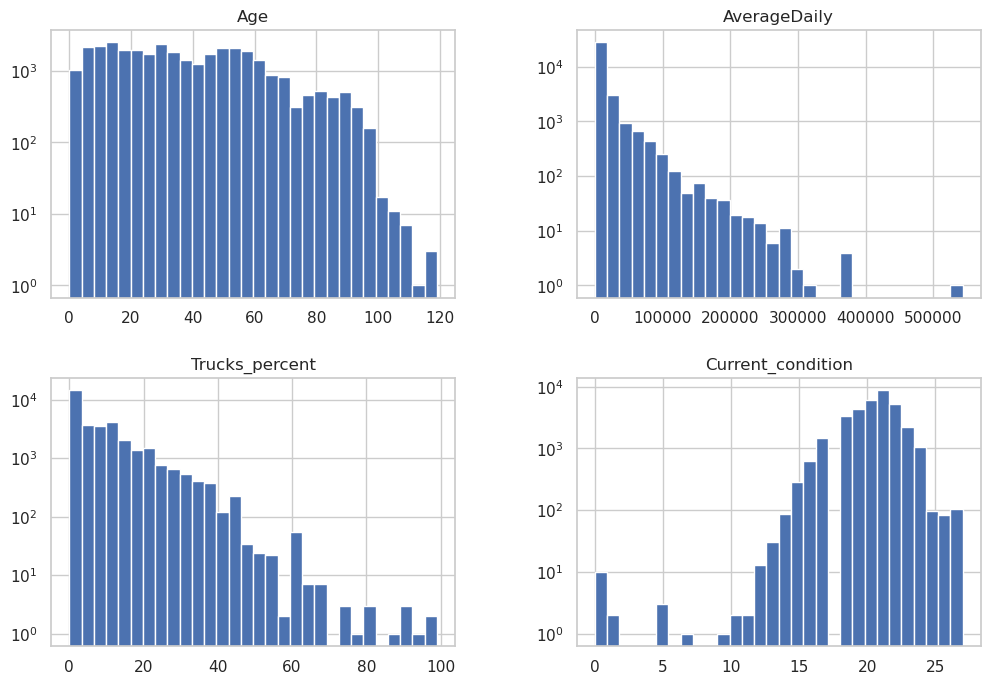

In [153]:
# 1. Look at distributions
df.hist(bins=30, figsize=(12,8), column=[ 'Age', 'AverageDaily','Trucks_percent','Current_condition'], log=True)



In [154]:
# 2. Fit the regression line


In [155]:
y = df.Current_condition # this is the target variable; we assue just one though more are possible
X = np.column_stack((df.Age,df.AverageDaily, df.Trucks_percent))
X[0:5]

array([[ 14.,   1.,   0.],
       [ 14.,   1.,   0.],
       [  7., 100.,   0.],
       [ 69.,  80.,   0.],
       [ 15., 150.,   4.]])

### Record R2 value

In [156]:
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
beta_Age, beta_AverageDaily, beta_Trucks_percent = reg.coef_
print('Estimated regression coefficient for Age is %4.2f' % beta_Age, 
      'change of max heart rate (beats / min) per year')
print('Estimated regression coefficient for AverageDaily is %4.2f' % beta_AverageDaily, 
      'change of max heart rate (beats / min) per mmHg')
print('Estimated regression coefficient for Trucks_percent is %4.2f' % beta_Trucks_percent, 
      'change of max heart rate (beats / min) per mmHg')

The R2 coefficient of determination is 0.354
The intercept is 22.1
Estimated regression coefficient for Age is -0.05 change of max heart rate (beats / min) per year
Estimated regression coefficient for AverageDaily is 0.00 change of max heart rate (beats / min) per mmHg
Estimated regression coefficient for Trucks_percent is 0.02 change of max heart rate (beats / min) per mmHg


The R2 value is 0.354, meaning that approximately 35.4% of the variation in Current_condition can be explained by the continuous predictor variables (Age, AverageDaily, and Trucks_percent).
This R2 value suggests a moderate fit, implying that while the predictors contribute to explaining the variability in the Current_condition, a significant portion of the variance remains unexplained, possibly due to other unmeasured factors or inherent variability in the data.

The estimated regression coefficient of age indicates that for each additional year of age, Current_condition is expected to decrease by approximately 0.05 units, holding all other factors constant. 

Similarly, for Average daily use, the lack of a meaningful slope(Estimated regression coefficient= 0) suggests no relationship between AverageDaily and Current_condition in this model. 

And, for Trucks_percent, a value of 0.02 suggests that for each additional percentage of trucks, Current_condition is expected to increase by 0.02 units.



In [157]:

# Calculate ranges for each predictor
age_range = df['Age'].quantile(0.9) - df['Age'].quantile(0.1)
average_daily_range = df['AverageDaily'].quantile(0.9) - df['AverageDaily'].quantile(0.1)
trucks_percent_range = df['Trucks_percent'].quantile(0.9) - df['Trucks_percent'].quantile(0.1)
current_condition_range = df['Current_condition'].quantile(0.9) - df['Current_condition'].quantile(0.1)

# Print the ranges
print('Age range (10th to 90th centile) is %3.1f years' % age_range)
print('Average Daily range (10th to 90th centile) is %3.1f' % average_daily_range)
print('Trucks Percentage range (10th to 90th centile) is %3.1f' % trucks_percent_range)
print('Current Condition range (10th to 90th centile) is %3.1f' % current_condition_range)

# Calculate the percentage change in Current Condition for each predictor variable
print('The change in Current Condition (as a percent of its range) given by the Age coefficient (over its range) is %4.1f percent'
      % (100 * (beta_Age * age_range) / current_condition_range))

print('The change in Current Condition (as a percent of its range) given by the Average Daily coefficient (over its range) is %4.1f percent'
      % (100 * (beta_AverageDaily * average_daily_range) / current_condition_range))

print('The change in Current Condition (as a percent of its range) given by the Trucks Percent coefficient (over its range) is %4.1f percent'
      % (100 * (beta_Trucks_percent * trucks_percent_range) / current_condition_range))

Age range (10th to 90th centile) is 61.0 years
Average Daily range (10th to 90th centile) is 29840.0
Trucks Percentage range (10th to 90th centile) is 23.0
Current Condition range (10th to 90th centile) is 5.0
The change in Current Condition (as a percent of its range) given by the Age coefficient (over its range) is -62.9 percent
The change in Current Condition (as a percent of its range) given by the Average Daily coefficient (over its range) is  0.0 percent
The change in Current Condition (as a percent of its range) given by the Trucks Percent coefficient (over its range) is  8.1 percent


**Considering range of continuous predictors to make predictions**

Given that the Age range (10th to 90th percentile) is 61.0 years, the change in Current_condition over this range is about -62.9% of its total range, indicating a substantial negative impact of Age on Current_condition.

With an AverageDaily range of 29,840.0, the effect remains effectively 0.0% of Current_condition’s total range.

With a range for Trucks_percent of 23.0, this contributes a change of approximately +8.1% to Current_condition, suggesting a modest positive effect.

### R2 Distribution of residuals (errors)

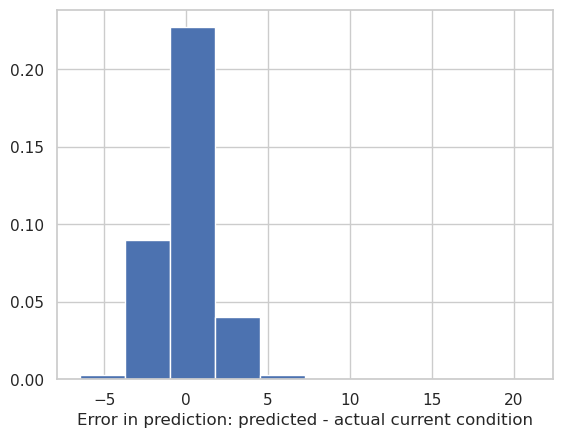

In [158]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - actual current condition')


In [159]:
# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error: 1.59


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The Root Mean Squared Error (RMSE), which represents the average magnitude of error in the model's predictions, is calculated as 1.59. This RMSE value indicates that, on average, the model's predictions deviate from the actual target values by about 1.59 units.

This distribution of residuals approximates a normal distribution, with most values concentrated around value 0.
This suggests that the model is appropriately capturing the relationships in the data without systematic bias. 

We can verify this in the plot below.
The distribution of predicted value with respect to the real value is plotted below. The plot shows a positive linear relationship between the predicted and real values.


Text(0, 0.5, 'Actual Value')

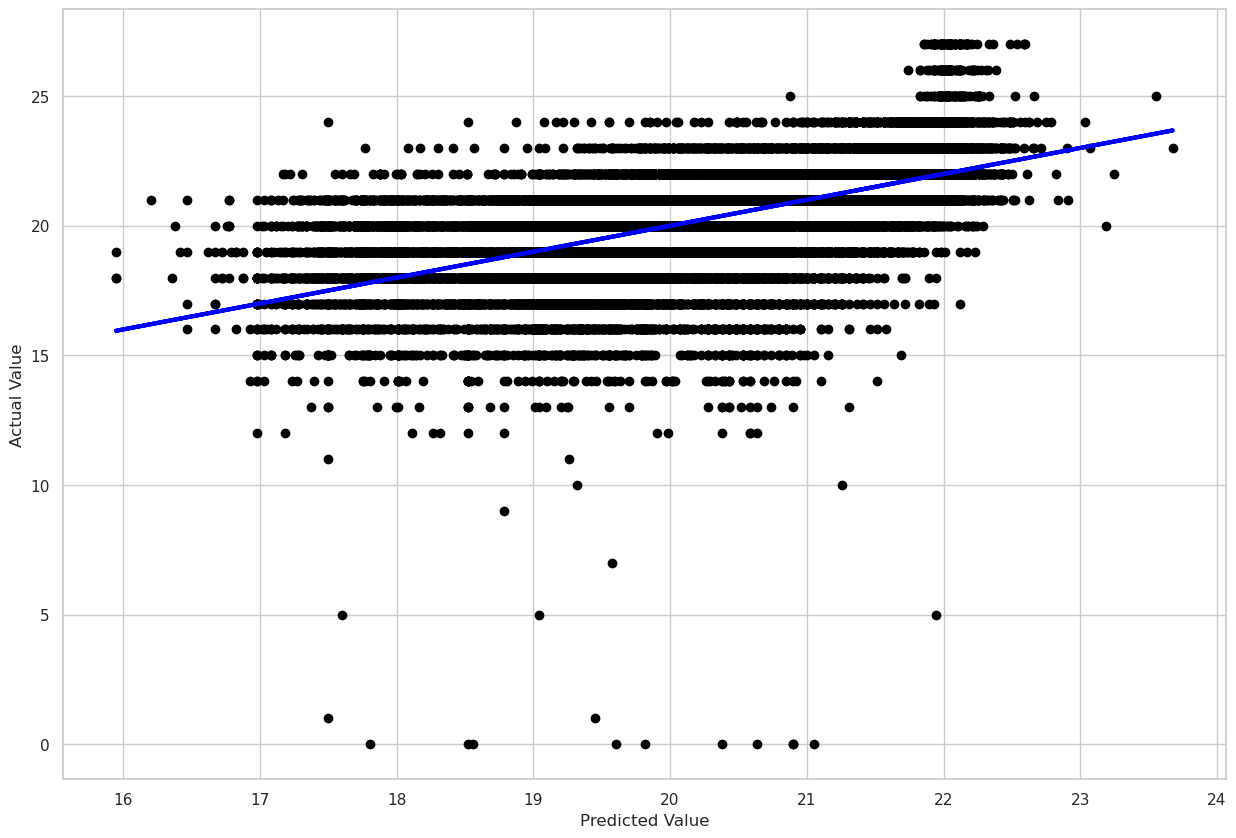

In [160]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)


a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### Use regression coefficients to compare the influence of the different predictors.

### Regression with categorical variables


In [161]:
# One-hot encoding for categorical variables (Material and Design)
df_encoded = pd.get_dummies(df[['Material', 'Design']], drop_first=True)


In [162]:
# Combine the predictors into a single array
X2 = np.column_stack((df.Age,df.AverageDaily, df.Trucks_percent, df_encoded.values))  # Using the encoded categorical variables

# Fit the linear regression model
reg2 = LinearRegression().fit(X2, y) # y was already assign previously with the continuous variables

# Print the R^2 coefficient of determination
print('The R^2 coefficient of determination is %4.3f' % reg2.score(X2, y))

# Print the intercept of the regression model
print('The intercept is %4.1f' % reg2.intercept_)

# Print the regression coefficients
print('The regression coefficients are:', reg2.coef_)

The R^2 coefficient of determination is 0.447
The intercept is 22.4
The regression coefficients are: [-4.87692215e-02 -6.68737177e-07  5.43317902e-03 -2.83184893e+00
 -1.36704050e+00  1.00646047e-01 -7.36949458e-02]


The R2 coefficient of determination is 0.447. This indicates that approximately 44.7% of the variability in the target variable is explained by the model.
The intercept, at 22.4, represents the estimated value of the target variable when all predictors are set to zero. 

The regression coefficients suggest that the predidctor with regression coefficient -2.83, corresponding to Material, and the predictor with regression coefficient -1.37, corresponding to design, have the most substantial influence on the target variable, with notable negative effects. Other predictors have more modest impacts, with small positive or negative relationships. This comparison highlights the relative importance of predictors in explaining the target variable's variance, suggesting that the model relies heavily on specific predictors for its explanatory power, as indicated by the R2 value.

## Conclusion

This analysis reveals the key factors impacting the current condition of bridges. The model's R2 of 0.447 indicates that roughly 44.7% of the variability in bridge condition is explained by the predictors, demonstrating moderate model strength. The intercept, 22.4, shows the baseline condition score when all predictors are zero, but actual values are influenced significantly by Age, Trucks_percent, and material and design types.

Impact of Age on Bridge Condition: Age has the most substantial effect on current bridge condition, with a projected decline of around -62.9% across its range. This suggests that as bridges age, their condition deteriorates significantly, highlighting the importance of age in maintenance prioritization.

Influence of Trucks Percent: While the effect of Trucks_percent is modest, it has a slight positive impact, contributing about +8.1% to condition scores across its range. This might suggest that bridges built for higher truck percentages may have design characteristics or materials that withstand wear better than bridges with lower truck use.

Effect of Average Daily Use: AverageDaily use did not show a substantial impact on bridge condition, indicating that factors beyond traffic volume (such as bridge type, material, and age) may play a more critical role in determining condition.

Significance of Material and Design Types: Material and design types emerged as the strongest categorical predictors, with coefficients of -2.83 and -1.37, respectively. Their negative relationships with bridge condition underscore the need for customized maintenance strategies, as different materials and design types exhibit distinct degradation patterns.

**Recommendations for future analysis**

- Explore Interaction Effects: Future analysis could investigate whether interactions between factors such as age, material, and truck percentage offer more precise insights into condition scores.

- Investigate Outliers and Model Non-Linear Relationships: Further examination of extreme values and potential non-linear relationships, particularly for high-traffic bridges, might improve model accuracy.

 Use Predictive Models to Forecast Future Conditions: By applying time-series analysis or forecasting models, we can predict future bridge conditions and optimize maintenance schedules proactively.

- Expand Dataset with Additional Predictors: Including environmental factors (e.g., weather impact) and detailed traffic patterns could further enhance the model's predictive ability.

This analysis offers a foundation for data-driven bridge maintenance strategies, emphasizing the importance of age and material in condition assessment and aiding the Texas Department of Transportation in prioritizing resources.